In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas

In [3]:
def draw(G) :
    return nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 alpha = 0.6, # transparence
                 node_size = [G.degree(node)*15 for node in G.nodes()],
                )

### Load data

In [23]:
nodepath = 'bloodborne/BB_nodes.json'
edgepath = 'bloodborne/BB_dir_edges.json'

In [24]:
with open(nodepath, mode = 'r', encoding='utf-8') as f:
    nodes = json.load(f)

In [25]:
with open(edgepath, mode = 'r', encoding='utf-8') as g :
    edges = json.load(g)

### Create Directed Graph

In [26]:
Gd = nx.DiGraph()

In [27]:
nodes_clean = []
for node in nodes:
    newnode = (node['id'], node)
    nodes_clean.append(newnode)
len(nodes_clean)

35

In [28]:
edges_clean = []
for edge in edges:
    for dest in edge['dest']:
        newedge = (edge['origin'], dest)
        edges_clean.append(newedge)
len(edges_clean)

71

In [29]:
Gd.add_nodes_from(nodes_clean)

In [30]:
Gd.add_edges_from(edges_clean)

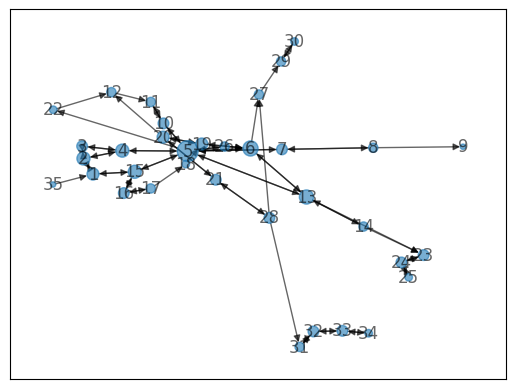

In [31]:
draw(Gd)

### Compute measures

In [32]:
G2 = nx.Graph(Gd)

In [33]:
nx.is_connected(G2)

True

In [34]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G = G2.subgraph(Gcc[0])

In [35]:
#nombre de noeuds
print(len(G.nodes()))

#nombre d'arêtes
print(len(G.edges()))

#diamètre
print(nx.diameter(G))

# Excentricité moyenne
values = []
for value in nx.eccentricity(G).values():
    values.append(value)   
mean_distance = sum(values)/len(values)
print(round(mean_distance,3))

#densité
print(round(nx.density(G),3))

#fermeture triadique
print(round(nx.transitivity(G),3))

# moy. chemin le plus court
print(round(nx.average_shortest_path_length(G),3))

#taille max. des cliques et cliques maximales
maxc = max([len(i) for i in list(nx.find_cliques(G))])
print(maxc)
for c in nx.find_cliques(G):
    if len(c) == maxc:
        print(c)

35
43
10
7.914
0.072
0.132
4.104
3
[2, 3, 4]
[5, 6, 26]
[5, 6, 13]
[14, 13, 23]


In [17]:
#degré des noeuds
for id, nb in sorted(dict(nx.degree(G)).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {nb}')

Firelink Shrine, 9
Darkroot Basin, 5
Anor Londo, 5
Undead Burg, 4
Undead Parish, 4


In [18]:
#centralité de proximité
for id, nb in sorted(nx.closeness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

Firelink Shrine, 0.339
Undead Parish, 0.304
Blighttown Swamp, 0.299
Catacombs 1, 0.27
Undead Burg, 0.266


In [19]:
#centralité intermédiaire
for id, nb in sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

Firelink Shrine, 0.731
Blighttown Swamp, 0.445
Undead Parish, 0.425
Sen's Fortress, 0.371
Anor Londo, 0.368


In [20]:
from tqdm import tqdm

fullnodes = []
ids = []
for el in tqdm(nodes_clean):
    entry = {
        'name': el[1]['name'],
        'zone': el[1]['zone'],
        'degree': nx.degree(G2)[el[0]],
        'closeness centrality' : round(nx.closeness_centrality(G2)[el[0]],3),
        'betweenness centrality' : round(nx.betweenness_centrality(G2)[el[0]],3),
    }

    fullnodes.append(entry)
    ids.append(el[0])

df = pandas.DataFrame(fullnodes, index=ids)    

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 93.93it/s]


In [22]:
df.to_excel('test.xlsx')